In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf

def lorentzian(fwhm,x,x0=0):
    return ((np.pi*fwhm)/2) * 1/(2*np.pi) * fwhm/((x-x0)**2+(0.5*fwhm)**2)

def lorentzian(fwhm,x,x0=0):
    return (0.5*fwhm)**2/((x-x0)**2+(0.5*fwhm)**2)

In [3]:
fwhm_design = 643942.754981
lorentzian_sep_factor = 2.25
dx = fwhm_design/lorentzian_sep_factor
dy = -dx

f = np.linspace(-1,1,1000)*(fwhm_design*5)
f_plot = f/1e6

In [4]:
ay = 1.0
ax = 1.0

lx = ax*lorentzian(fwhm_design, f, dx)
ly = ay*lorentzian(fwhm_design, f, dy)
lz = (ax+ay)*lorentzian(fwhm_design, f, 0)

/home/alexei/git/alexei_thesis/notebooks/commissioning/lorentzian_comparison.png
/home/alexei/git/alexei_thesis/notebooks/commissioning/lorentzian_comparison.pdf


0

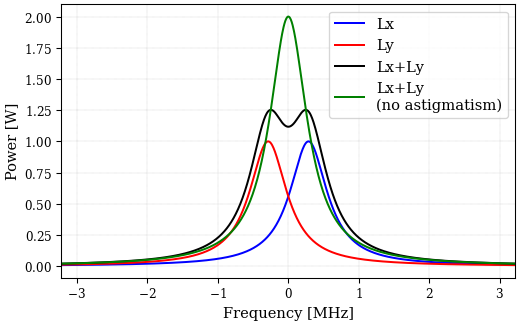

In [7]:
fig = plt.figure(figsize=mpf.thesis_figsize())
plt.plot(f_plot,lx)
plt.plot(f_plot,ly)
plt.plot(f_plot,(lx+ly))
plt.plot(f_plot,lz,c='g')
plt.grid(True)
plt.ylabel('Power [W]')
plt.xlabel('Frequency [MHz]')
plt.legend(['Lx','Ly','Lx+Ly','Lx+Ly\n(no astigmatism)'])

mpf.thesis_savefig(fig, 'lorentzian_comparison')

In [8]:
aly = np.linspace(0, 1, 301)[::-1]
alx = np.ones(301)

lxs = np.outer(alx, lorentzian(fwhm_design, f, dx))
lys = np.outer(aly, lorentzian(fwhm_design, f, dy))

lls = lxs+lys

(<matplotlib.image.AxesImage at 0x7f89cd2b0bb0>,
 <matplotlib.colorbar.Colorbar at 0x7f89cd174220>)

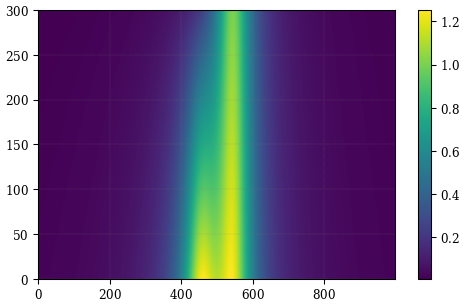

In [9]:
mpf.imshow(lls)

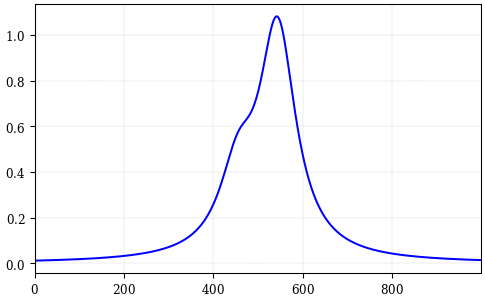

In [10]:
plt.plot(lls[200,:])

/home/alexei/git/alexei_thesis/notebooks/commissioning/OMC_mismatch_correction_factor.png
/home/alexei/git/alexei_thesis/notebooks/commissioning/OMC_mismatch_correction_factor.pdf


0

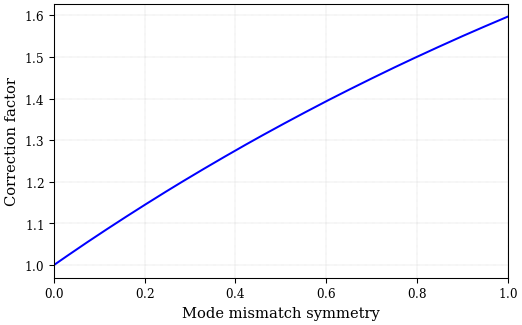

In [11]:
fig = plt.figure(figsize=mpf.thesis_figsize())
plt.plot(aly, (aly+alx)/np.max(lls,axis=1))
plt.ylabel('Correction factor')
plt.xlabel('Mode mismatch symmetry')
# plt.title('Peak height correction factor from LHO OMC astigmatism')

mpf.thesis_savefig(fig, 'OMC_mismatch_correction_factor')

In [368]:
2/1.6

1.25

In [186]:
C = 10e-9
w = np.geomspace(1, 50e6, 301)

Rs  = [50, 1000, 10000, 1e6]
Hs = []
for R in Rs:
    H = np.abs(R/(1+1j*w*R*C))
    Hs.append(H)

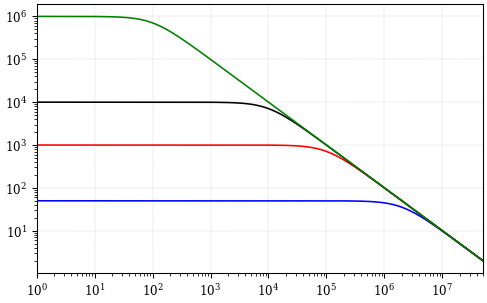

In [187]:
plt.loglog(w,Hs[0])
plt.loglog(w,Hs[1])
plt.loglog(w,Hs[2])
plt.loglog(w,Hs[3])

In [312]:
C = 10e-9
w = np.geomspace(1, 50e6, 301)

Rs  = [50, 1000, 10000, 1e6]
Hs = []
for R in Rs:
    Ho = 1/(1j*w*C)
    Hi = 1/(1j*w*C) + R
    H = np.abs(Ho/Hi)
    Hs.append(H)

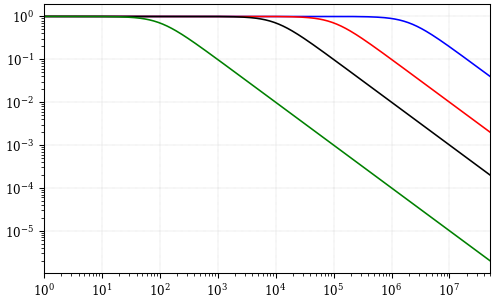

In [313]:
plt.loglog(w,Hs[0])
plt.loglog(w,Hs[1])
plt.loglog(w,Hs[2])
plt.loglog(w,Hs[3])

In [311]:
C = 10e-9
w = np.geomspace(1, 50e6, 301)

R1 = 10000
R3 = 1e6
Rs  = [50, 1000, 10000, 1e6]
Hs = []
for R2 in Rs:
    Re = R2*R3/(R2+R3)
    Hi = Re
    Ho = Re + R1 + 1/(1j*w*C)
    H = np.abs(Hi/Ho)
    Hs.append(H)

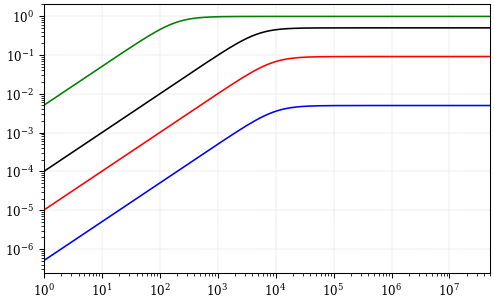

In [248]:
plt.loglog(w,Hs[0])
plt.loglog(w,Hs[1])
plt.loglog(w,Hs[2])
plt.loglog(w,Hs[3])

In [217]:
C = 10e-9
w = np.geomspace(1, 50e6, 301)

R1 = 50
R3 = 1e6
Rs  = [50, 1000, 10000, 1e6]
Hs = []
for R2 in Rs:
    Re = R2*R3/(R2+R3)
    H = np.abs(R3/(1/(1j*w*C) + R1 + Re))
    Hs.append(H)

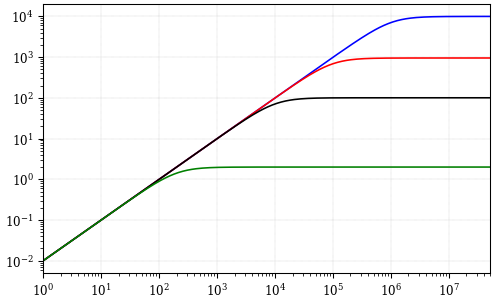

In [218]:
plt.loglog(w,Hs[0])
plt.loglog(w,Hs[1])
plt.loglog(w,Hs[2])
plt.loglog(w,Hs[3])

In [340]:
def par(x1,x2):
    return x1*x2/(x1+x2)

C = 1e-9
w = np.geomspace(100, 500e6, 301)

R1 = 50
R3 = 1e6
Rs  = [50, 1000, 10000, 1e6]
Hs = []
for R2 in Rs:
    Re = par(R2, R3)
    Ho = Re
    Hi = par(1/(1j*w*C), R1 + Re)
    H = Hi/Ho
    Hs.append(H)

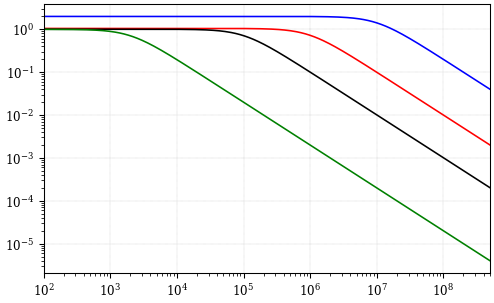

In [342]:
plt.loglog(w,np.abs(Hs[0]))
plt.loglog(w,np.abs(Hs[1]))
plt.loglog(w,np.abs(Hs[2]))
plt.loglog(w,np.abs(Hs[3]))

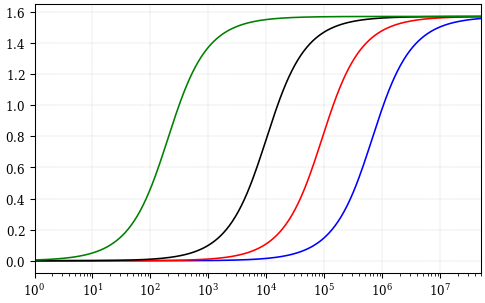

In [306]:
plt.semilogx(w,np.angle(Hs[0]))
plt.semilogx(w,np.angle(Hs[1]))
plt.semilogx(w,np.angle(Hs[2]))
plt.semilogx(w,np.angle(Hs[3]))